In [72]:
# Program Imports
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import scipy
from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds

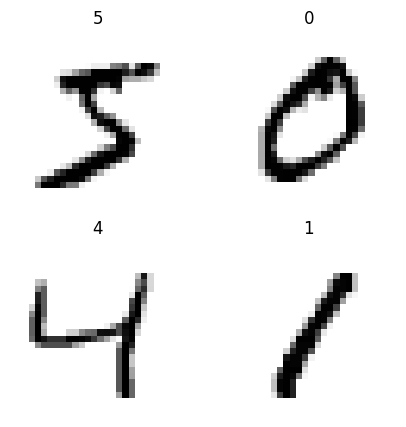

In [73]:
# PART 1
## 1.1 Data loading and preprocessing
# Load mnist dataset 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

fig, ax = plt.subplots(2, 2, figsize=(5, 5))
ax[0,0].imshow(train_images[0], cmap="binary")
ax[0,0].axis('off')
ax[0,0].title.set_text(train_labels[0])
ax[0,1].imshow(train_images[1], cmap="binary")
ax[0,1].axis('off')
ax[0,1].title.set_text(train_labels[1])
ax[1,0].imshow(train_images[2], cmap="binary")
ax[1,0].axis('off')
ax[1,0].title.set_text(train_labels[2])
ax[1,1].imshow(train_images[3], cmap="binary")
ax[1,1].axis('off')
ax[1,1].title.set_text(train_labels[3])
plt.show()

In [74]:
# Normalize images
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 127 - 1, label

# Training pipeline
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Evaluation pipeline
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [75]:
## 1.2 Network design
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(50, 5, padding = "valid", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(50, 5, padding = "valid", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(2, activation='linear'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=['accuracy']
)

mod = model.fit(ds_train, batch_size=100, epochs=200, verbose=True) #Revert epochs to 200 later

Epoch 1/200
469/469 [==============================] - 12s 21ms/step - loss: 1.6377 - accuracy: 0.3812
Epoch 2/200
469/469 [==============================] - 10s 20ms/step - loss: 1.0375 - accuracy: 0.6004
Epoch 3/200
469/469 [==============================] - 10s 20ms/step - loss: 0.7996 - accuracy: 0.7133
Epoch 4/200
469/469 [==============================] - 9s 20ms/step - loss: 0.6216 - accuracy: 0.8167
Epoch 5/200
469/469 [==============================] - 9s 20ms/step - loss: 0.5047 - accuracy: 0.8661
Epoch 6/200
469/469 [==============================] - 10s 21ms/step - loss: 0.4268 - accuracy: 0.8896
Epoch 7/200
469/469 [==============================] - 10s 20ms/step - loss: 0.3679 - accuracy: 0.9058
Epoch 8/200
469/469 [==============================] - 11s 24ms/step - loss: 0.3226 - accuracy: 0.9172
Epoch 9/200
469/469 [==============================] - 10s 20ms/step - loss: 0.2852 - accuracy: 0.9280
Epoch 10/200
469/469 [==============================] - 10s 22ms/step - los

2024-01-29 10:16:40.740058: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 1099 of 60000
2024-01-29 10:16:40.740671: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 1100 of 60000
2024-01-29 10:16:40.740703: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 1101 of 60000
2024-01-29 10:16:40.740709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 1102 of 60000
2024-01-29 10:16:40.740714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 1103 of 60000
2024-01-29 10:16:40.740719: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 1104 of 60000
2024-01-29 10:16:40.740723: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling 

469/469 [==============================] - 136s 30ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 131/200
469/469 [==============================] - 11s 23ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 132/200
185/469 [==========>...................] - ETA: 6s - loss: 0.0017 - accuracy: 1.0000

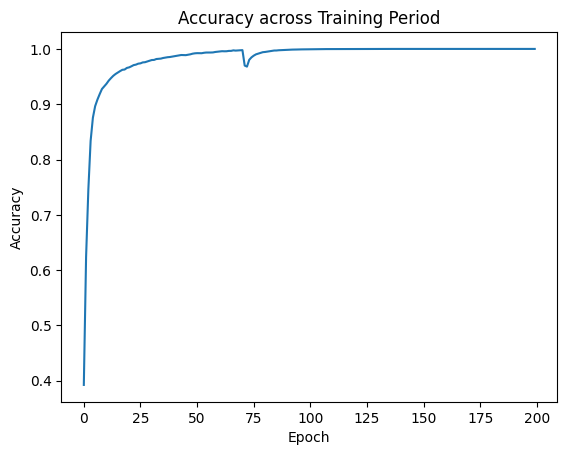

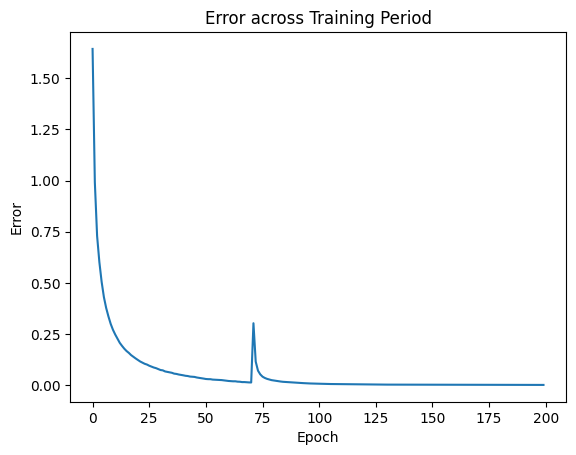

In [ ]:
# Plot of Accuracy
plt.plot(mod.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy across Training Period')
plt.show()

# Plot of Error
plt.plot(mod.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error across Training Period')
plt.show()

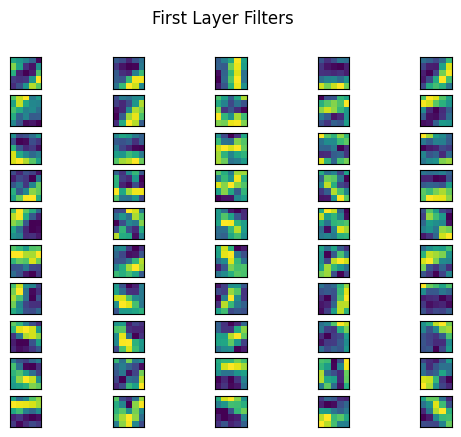

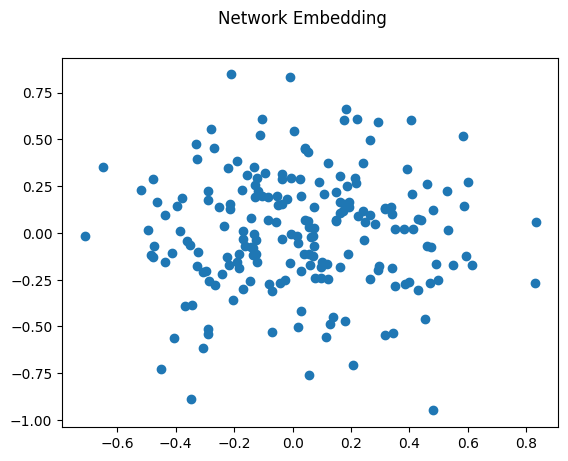

In [ ]:
# PART 2
# Filter matrices
filter = np.transpose(model.layers[0].weights[0], (2,3,0,1))[0]

fig, ax = plt.subplots(10, 5)
fig.suptitle("First Layer Filters")
for filter, ax in zip(filter, ax.ravel()):
 ax.imshow(filter)
 ax.get_yaxis().set_visible(False)
 ax.get_xaxis().set_visible(False)
plt.show()

# Scatter plot of embedding vectors (layer 7)
embed = model.layers[6].weights[0]
embed = np.transpose(embed)

embx = embed[0,:]
emby = embed[1,:]

fig, ax = plt.subplots()
scatter = ax.scatter(embx, emby) # add embed layers
fig.suptitle("Network Embedding")
plt.show()

These filter matrices appear to be primarily shaped as lines and curves, which makes sense as the values trained on (the numbers) are composed of lines and curves. The network appears to be starting to create a star-like pattern of the embedding vectors.

1/1 [==============================] - 0s 15ms/step
Rot. Angle: 0 degrees, Accuracy: 0.1
Rot. Angle: 15 degrees, Accuracy: 0.15
Rot. Angle: 30 degrees, Accuracy: 0.16666666666666666
Rot. Angle: 45 degrees, Accuracy: 0.125
Rot. Angle: 60 degrees, Accuracy: 0.1
Rot. Angle: 75 degrees, Accuracy: 0.1
Rot. Angle: 90 degrees, Accuracy: 0.1
Rot. Angle: 105 degrees, Accuracy: 0.1
Rot. Angle: 120 degrees, Accuracy: 0.08888888888888889
Rot. Angle: 135 degrees, Accuracy: 0.09
Rot. Angle: 150 degrees, Accuracy: 0.08181818181818182
Rot. Angle: 165 degrees, Accuracy: 0.08333333333333333
Rot. Angle: 180 degrees, Accuracy: 0.09230769230769231


<function matplotlib.pyplot.show(close=None, block=None)>

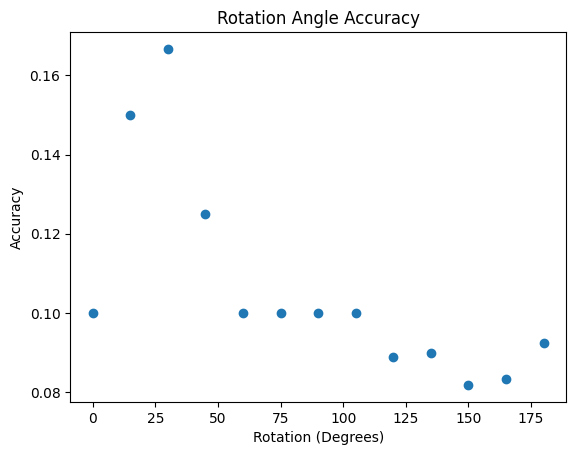

In [ ]:
#Rotate each digit 15 degrees fom 0 to 180 (13 sets by 10 digits)
# first create set of test images 
rot_index = []
rotatelabels = []
rotatedsamples = []

# Find the index of the first occurrence of each label in test_labels
for i in range(10):
    rot_index.append(np.where(test_labels == i)[0][0])
    rotatelabels.append(test_labels[rot_index[i]])
    rotatedsamples.append(test_images[rot_index[i]])

rotAccuracy = []
predictions = []
for i in range(13):
    storedRot = []
    for k in range(len(rotatedsamples)):
       storedRot.append(scipy.ndimage.rotate(test_images[k], 15*i, reshape = False))

    storedRot = np.array(storedRot)

    predictions.append(model.predict(storedRot, verbose=1))
    accuracy = np.mean(np.argmax(predictions, axis=1) == rotatelabels)
    rotAccuracy.append(accuracy)

# Check results
for k, result in enumerate(rotAccuracy):
   print(f"Rot. Angle: {15*k} degrees, Accuracy: {result}")

rotAngle = [15*k for k in range(len(rotAccuracy))]

plt.plot(rotAngle, rotAccuracy, 'o')
plt.title("Rotation Angle Accuracy")
plt.xlabel("Rotation (Degrees)")
plt.ylabel("Accuracy")
plt.show

I did not account for the individual rotation of number to evaluate the algorithm's classification of said numbers. For the code to be invariant to rotation, the training images should be inputted at a random angle to train the neural network to better identify rotated numbers.